In [3]:
import matplotlib.pyplot as plt
from estimate_rot import *
from scipy import io
import time

In [4]:
time_start = time.time()
roll, pitch, yaw = estimate_rot(1)
time_end = time.time()
print (time_start - time_end)

-17.868412971496582


In [51]:
roll

array([ 4.61428922e-05, -4.01625465e-05,  2.04706424e-05, ...,
        8.70376088e-03,  8.74559565e-03,  8.66220474e-03])

In [6]:
a = len(roll)

In [7]:
a

5645

In [8]:
b = len(pitch)

In [9]:
b

5645

In [10]:
filename = "vicon/viconRot1.mat"

In [11]:
vicon_raw = io.loadmat(filename)

In [12]:
vicon_raw

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Feb  2 12:57:59 2011',
 '__version__': '1.0',
 'rots': array([[[ 0.99992633,  0.99986318,  0.99991805, ...,  0.99953676,
           0.99949541,  0.99953609],
         [-0.00453991, -0.00420982, -0.00471697, ..., -0.0303378 ,
          -0.02996551, -0.03035833],
         [-0.01125718, -0.01599676, -0.01190115, ..., -0.00242508,
          -0.0105351 , -0.00244617]],
 
        [[ 0.00455797,  0.00422815,  0.00473711, ...,  0.03032446,
           0.0299045 ,  0.03034568],
         [ 0.99998837,  0.99999044,  0.9999874 , ...,  0.99952572,
           0.99953534,  0.99952669],
         [ 0.00157913,  0.00111227,  0.00166397, ..., -0.00536339,
          -0.00590162, -0.0050531 ]],
 
        [[ 0.01124988,  0.01599193,  0.01189315, ...,  0.00258665,
           0.01070705,  0.00259842],
         [-0.00163033, -0.00117976, -0.00172021, ...,  0.00528737,
           0.00558359,  0.00497653],
         [ 0.99

In [13]:
vicon_ts = vicon_raw["ts"]

In [18]:
vicon_ts

array([[1.29663678e+09, 1.29663678e+09, 1.29663678e+09, ...,
        1.29663684e+09, 1.29663684e+09, 1.29663684e+09]])

In [21]:
a = len(vicon_ts[0])
a

5561

In [27]:
vicon_rots = np.array(vicon_raw["rots"])

In [30]:
vicon_rots

array([[[ 0.99992633,  0.99986318,  0.99991805, ...,  0.99953676,
          0.99949541,  0.99953609],
        [-0.00453991, -0.00420982, -0.00471697, ..., -0.0303378 ,
         -0.02996551, -0.03035833],
        [-0.01125718, -0.01599676, -0.01190115, ..., -0.00242508,
         -0.0105351 , -0.00244617]],

       [[ 0.00455797,  0.00422815,  0.00473711, ...,  0.03032446,
          0.0299045 ,  0.03034568],
        [ 0.99998837,  0.99999044,  0.9999874 , ...,  0.99952572,
          0.99953534,  0.99952669],
        [ 0.00157913,  0.00111227,  0.00166397, ..., -0.00536339,
         -0.00590162, -0.0050531 ]],

       [[ 0.01124988,  0.01599193,  0.01189315, ...,  0.00258665,
          0.01070705,  0.00259842],
        [-0.00163033, -0.00117976, -0.00172021, ...,  0.00528737,
          0.00558359,  0.00497653],
        [ 0.99993539,  0.99987142,  0.99992779, ...,  0.99998268,
          0.99992709,  0.99998424]]])

In [33]:
vicon_rots[:,:,5560]

array([[ 0.99953609, -0.03035833, -0.00244617],
       [ 0.03034568,  0.99952669, -0.0050531 ],
       [ 0.00259842,  0.00497653,  0.99998424]])

In [34]:

def rotation_to_Euler(Rots):



    N = Rots.shape[2]

    Eulers = np.zeros((3, 0))



    for i in range(N):

        R = Rots[:, :, i]



        sy = np.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])



        singular = sy < 1e-6



        if not singular:

            x = np.arctan2(R[2, 1], R[2, 2])

            y = np.arctan2(-R[2, 0], sy)

            z = np.arctan2(R[1, 0], R[0, 0])

        else:

            x = np.arctan2(-R[1, 2], R[1, 1])

            y = np.arctan2(-R[2, 0], sy)

            z = 0



        euler = np.array([[x], [y], [z]])

        Eulers = np.concatenate((Eulers, euler), axis=1)



    return Eulers

In [36]:
e = rotation_to_Euler(vicon_rots)

In [37]:
e

array([[-0.00163043, -0.00117991, -0.00172034, ...,  0.00528741,
         0.00558394,  0.00497656],
       [-0.01125011, -0.01599261, -0.01189343, ..., -0.00258665,
        -0.01070725, -0.00259842],
       [ 0.00455827,  0.0042287 ,  0.00473746, ...,  0.03032921,
         0.02991068,  0.03035044]])

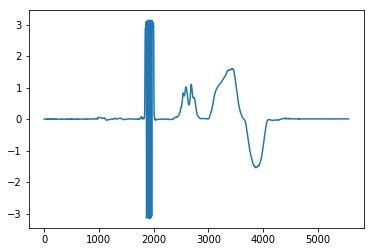

In [44]:
plt.plot(e[0])

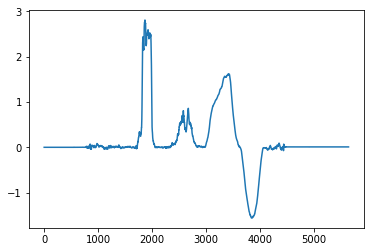

In [46]:
plt.plot(roll)

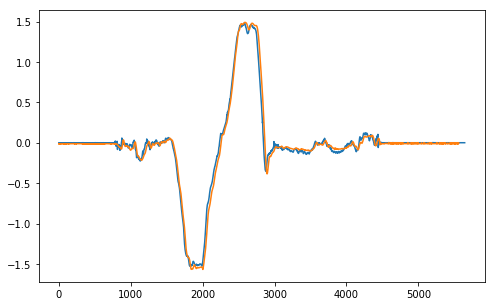

In [48]:
plt.figure(num=3,figsize=(8,5))
plt.plot(pitch)
plt.plot(e[1])
